# Real-world Data Wrangling

# Introduction

###  Problem Statement


There is no clear signs of when we should increase the technical support employees to answer questions about the company. And also we don't have any clue of what distribution the predictors represent? . Having three predictors represent redundanc, as we should have one value to avoid confusion.

<br>
which month has the most tweets sent?
<br>
what is the distribution of the combined predictors ?




# Libraries

In [6]:
import pandas as pd # Dataframe manipulation
import numpy as np # Mathematical Operations
from scipy import stats, integrate
import matplotlib.pyplot as plt
import json # JSON manipulation
import os # Directory manipulation

import requests # Request to server to download files

##  Gather data


###  Gather at least two datasets using two different data gathering methods



#### **df_breeds_pred**

Dataset brief description : This dataset provide predictors and the breed , it is important for us to load and clean it to use the prediction and help us find the statistics and the power of our predictors

Type: TSV File

Method: it is through Udacity Resources 

In [7]:
# First method is by requesting

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', "wb") as file: file.write(response.content)
df_breeds_pred = pd.read_csv('image-predictions.tsv', sep="\t")
df_breeds_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

we got the dataset by requesting and load it by saperating the tabs since it is Tabs Saperated values

#### df_twitter_arch

Dataset brief description : this dataset provide an important metric , it is the time the tweet has been sent , part of our problem is to know from this sample at what time is the peak time to assign more technical support during that time

Type: CSV File

Method: It was downloaded manually and uploaded to the jupyter notebook

In [8]:

# Import Manually Downloaded Data
df_twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

df_twitter_arch.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

loading the dataset by using pandas' read function

## Assess data


### df_breeds_pred dataset 

we will use the usual commands to explore the dataset

In [9]:
df_breeds_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

p1 looks like the main predictor

In [10]:
df_breeds_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


no missing values

In [11]:
df_breeds_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

no NA values

In [12]:
df_breeds_pred.duplicated().sum()

0

no duplicated rows

In [13]:
df_breeds_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

we saw the relations among the variables and we noticed that 'img_num' has no value added

In [14]:
df_breeds_pred.shape

(2075, 12)

### Issue : 
Quality :<br>
1- 'img_num' column has no added value <br>

tidiness :<br>
1- probabilities shoud be combined <br>

### df_twitter_arch dataset 

we will use the usual commands to explore the dataset

In [15]:
df_twitter_arch.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

a lot of unwanted columns

In [16]:
df_twitter_arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [17]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

we have Null values 

In [18]:
df_twitter_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
df_twitter_arch.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
df_twitter_arch.duplicated().sum()

0

### Issue : 
Quality :<br>
Some of the columns have missing values:<br>
in_reply_to_status_id: 78 non-null float64<br>
in_reply_to_user_id: 78 non-null float64<br>
retweeted_status_id: 181 non-null float64<br>
retweeted_status_user_id: 181 non-null float64<br>
retweeted_status_timestamp: 181 non-null object<br>
expanded_urls: 2297 non-null object <br>

tidiness :<br>
doggo floofer pupper puppo should be one column <br>


## 3. Clean data


In [21]:
clean_df_breeds_pred = df_breeds_pred.copy()
clean_df_twitter_arch = df_twitter_arch.copy()

to not mess the raw data

## df_breeds_pred
### Quality issue 1 :  'img_num' column has no added value

In [22]:
clean_df_breeds_pred = clean_df_breeds_pred.drop('img_num' , axis=1)

as we stated before , img_num should be dropped as part of the cleaning

In [23]:
clean_df_breeds_pred

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
0     Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                    redbone  0.506826    True  miniature_pinscher  0.074192   
2            German_shepherd  0.596461    True            malinois  0.138584   
3        Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4         miniature_pinscher  0.560311    True          Rottweiler  0.243682   
...                      ...       ...     ...                 ...       ...   
2070                  basset  0.555712    True    English_springer  0.225770   
2071             paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072               Chihuahua  0.716012    True            malamute  0.078253   
2073               Chihuahua  0.323581    True            Pekinese  0.090647   
2074                  orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
0       True            Shetland_sheepdog  0.061428    True  
1       True          Rhodesian_ridgeback  0.072010    True  
2       True                   bloodhound  0.116197    True  
3       True           miniature_pinscher  0.222752    True  
4       True                     Doberman  0.154629    True  
...      ...                          ...       ...     ...  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False  

[2075 rows x 11 columns]

Justification: we don't need this column as it doesn't add any value 

### **Tidiness Issue 1: probabilities shoud be combined and decisions**

In [24]:
clean_df_breeds_pred['Probability_of_dog'] = (clean_df_breeds_pred['p1_conf'] + clean_df_breeds_pred['p2_conf'] + clean_df_breeds_pred['p3_conf'])/3
clean_df_breeds_pred=clean_df_breeds_pred.drop(['p1_conf' , 'p2_conf','p3_conf'] , axis = 1)
clean_df_breeds_pred=clean_df_breeds_pred.drop(['p1_dog' , 'p2_dog','p3_dog'] , axis = 1)

combining the predictors to have one value and one decision maker

In [25]:
clean_df_breeds_pred.loc[clean_df_breeds_pred['Probability_of_dog'] < 0.2, 'is_it_a_dog'] = False
clean_df_breeds_pred.loc[clean_df_breeds_pred['Probability_of_dog'] >= 0.2, 'is_it_a_dog'] = True

putting the threshold to 0.2

In [26]:
clean_df_breeds_pred

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

                          p1                  p2                           p3  \
0     Welsh_springer_spaniel              collie            Shetland_sheepdog   
1                    redbone  miniature_pinscher          Rhodesian_ridgeback   
2            German_shepherd            malinois                   bloodhound   
3        Rhodesian_ridgeback             redbone           miniature_pinscher   
4         miniature_pinscher          Rottweiler                     Doberman   
...                      ...                 ...                          ...   
2070                  basset    English_springer  German_short-haired_pointer   
2071             paper_towel  Labrador_retriever                      spatula   
2072               Chihuahua            malamute                       kelpie   
2073               Chihuahua            Pekinese                     papillon   
2074                  orange               bagel                       banana   

      Probability_of_dog is_it_a_dog  
0               0.227723        True  
1               0.217676        True  
2               0.283747        True  
3               0.330527        True  
4               0.319541        True  
...                  ...         ...  
2070            0.318900        True  
2071            0.126400       False  
2072            0.275215        True  
2073            0.161061       False  
2074            0.086337       False  

[2075 rows x 7 columns]

Justification: we combined the predictors to have one decision maker and one value where we covered all the three predictors prespectives to have more accurate decision

In [27]:
assert ((clean_df_breeds_pred['is_it_a_dog'].isna().sum()) == 0)
assert ((clean_df_breeds_pred['Probability_of_dog'].isna().sum()) == 0)

to make sure we fully cleaned the dataset and fixed the structure

## df_twitter_arch
### Quality issue 2 :  missing values

In [28]:
#FILL IN - Apply the cleaning strategy
clean_df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

we have 5 columns have less than 200 non-null values , we should remove them 

In [29]:
clean_df_twitter_arch=clean_df_twitter_arch.drop(['in_reply_to_status_id' ,'in_reply_to_user_id' , 'retweeted_status_id' ,'retweeted_status_user_id' , 'retweeted_status_timestamp'] , axis =1)

we removed any column with less than 200 non-null 

In [30]:
clean_df_twitter_arch = clean_df_twitter_arch.drop(clean_df_twitter_arch[clean_df_twitter_arch['expanded_urls'].isna()].index)

In [31]:
clean_df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


we removed rows with NaN urls by obtaining the index of those rows and drop them

In [32]:
clean_df_twitter_arch = clean_df_twitter_arch.reset_index(drop=True)


reset the index after we removed some rows

In [33]:
clean_df_twitter_arch['timestamp'] = pd.to_datetime(clean_df_twitter_arch['timestamp'])
clean_df_twitter_arch['month'] = clean_df_twitter_arch['timestamp'].dt.month
clean_df_twitter_arch = clean_df_twitter_arch.drop('timestamp' , axis=1)
clean_df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   source              2297 non-null   object
 2   text                2297 non-null   object
 3   expanded_urls       2297 non-null   object
 4   rating_numerator    2297 non-null   int64 
 5   rating_denominator  2297 non-null   int64 
 6   name                2297 non-null   object
 7   doggo               2297 non-null   object
 8   floofer             2297 non-null   object
 9   pupper              2297 non-null   object
 10  puppo               2297 non-null   object
 11  month               2297 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 215.5+ KB


we converted the 'timestamp' to datetime first , then we obtained the month as saperate column so that we drop the timestamp since we need only the month from it

### **Tidiness Issue 2: doggo floofer pupper puppo should be one column**

In [30]:
rr = clean_df_twitter_arch.shape[0]
c = 0
while c < rr:
    if clean_df_twitter_arch.loc[c, 'doggo'] != 'None':
        clean_df_twitter_arch.loc[c, 'breed'] = 'doggo'
    elif clean_df_twitter_arch.loc[c, 'pupper'] != 'None':
        clean_df_twitter_arch.loc[c, 'breed'] = 'pupper'
    elif clean_df_twitter_arch.loc[c, 'puppo'] != 'None':
        clean_df_twitter_arch.loc[c, 'breed'] = 'puppo'
    elif clean_df_twitter_arch.loc[c, 'floofer'] != 'None':
        clean_df_twitter_arch.loc[c, 'breed'] = 'floofer'
    else:
        clean_df_twitter_arch.loc[c, 'breed'] = 'not defined'
    c = c + 1

created a column by a loop that will iterate each row and see if any of those four column has a value other than 'none' , so basically we consolidate four columns into one

In [31]:
clean_df_twitter_arch=clean_df_twitter_arch.drop(['doggo' , 'pupper' , 'puppo' ,'floofer'] , axis = 1)

we dropped them since we have their input in a saperate column

In [32]:
clean_df_twitter_arch.breed.nunique()

5

here we see we have the four values of the four boolean columns and 'none'

In [33]:
clean_df_twitter_arch.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  month        breed  
0                  10   Phineas      8  not defined  
1                  10     Tilly      8  not defined  
2                  10    Archie      7  not defined  
3                  10     Darla      7  not defined  
4                  10  Franklin      7  not defined

Justification: we combined four columns into one column since they are boolean , so we have only one column to fix the structure

### **Remove unnecessary variables and combine datasets**

now we will only consider the columns that will help us answer the questions and resolve the problem , then  we will combine them into one dataset using the common column 'tweet_id'

In [34]:
clean_df_twitter_arch = clean_df_twitter_arch[['tweet_id'  , 'rating_numerator' ,'rating_denominator' , 'month']]
clean_df_breeds_pred = clean_df_breeds_pred[['tweet_id' ,'Probability_of_dog' ]]
df = pd.merge(clean_df_twitter_arch, clean_df_breeds_pred, on='tweet_id')
df.head()

tweet_id  rating_numerator  rating_denominator  month  \
0  892420643555336193                13                  10      8   
1  892177421306343426                13                  10      8   
2  891815181378084864                12                  10      7   
3  891689557279858688                13                  10      7   
4  891327558926688256                12                  10      7   

   Probability_of_dog  
0            0.086337  
1            0.161061  
2            0.275215  
3            0.126400  
4            0.318900

## 4. Update your data store


saving the cleaned merged version of the data and the raw data as csv files , without using the fisrt column as an index

In [35]:
df.to_csv('cleaned wrangling project data.csv', index=False)
df_breeds_pred.to_csv('raw wrangling project data1.csv', index=False)
df_twitter_arch.to_csv('raw wrangling project data2.csv', index=False)

## 5. Answer the research question


## Which month has the most tweets sent ?

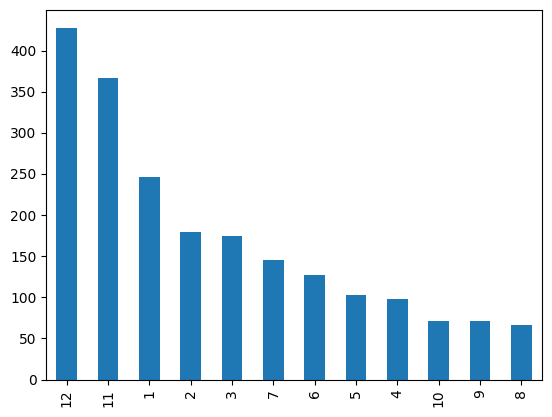

In [36]:
fig, ax = plt.subplots()
df['month'].value_counts().plot(ax=ax, kind='bar');

the graph shows that at the end of the year most users tweet more

## what is the distribution of the combined predictors?

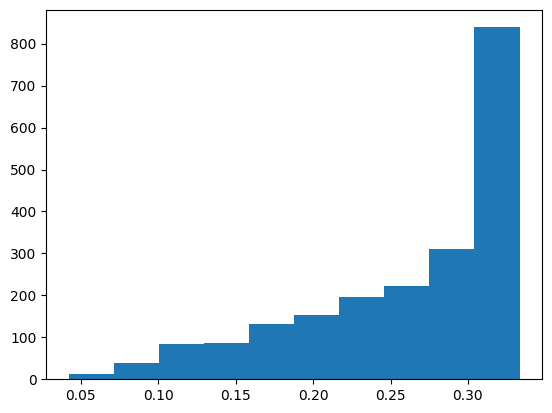

In [37]:
fig, ax = plt.subplots()
plt.hist(df['Probability_of_dog']);

the distribution is left skewed , and around 30% our predictor mostly predict

### **5.2:** Reflection

firstly I would get more replies to act as a feedback for the prediction , then I would closely observe the predictors to assign weight for each of them instead of giving them equal weight, and that would help me create a model to learn from this data and assign new pictures with the right breed. Last but not least, I will explore the time in more detailed way to catch any trend.